In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('moviesRatings/oneDs_selected_dummies.csv')

In [39]:
df.shape

(2203, 136)

In [6]:
df
# Initialize counters
binary_columns_count = 0
continuous_columns_count = 0

# Threshold for considering a column as continuous
threshold_continuous = 0.05 * df.shape[0]

# Loop through each column and check unique values
for col in df.columns:
    unique_values = df[col].nunique()

    # Check if the column is binary
    if unique_values == 2:
        binary_columns_count += 1

    # Check if the column is continuous
    if unique_values > threshold_continuous:
        continuous_columns_count += 1

# Print results
print(f"Number of binary columns (exactly 2 unique values): {binary_columns_count}")
print(f"Number of continuous columns: {continuous_columns_count}")


Number of binary columns (exactly 2 unique values): 117
Number of continuous columns: 13


In [8]:
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

# Initialize a dictionary to store the binned percentage counts
percentage_bins = {
    '0-10%': 0,
    '10-20%': 0,
    '20-30%': 0,
    '30-40%': 0,
    '40-50%': 0,
    '50-60%': 0,
    '60-70%': 0,
    '70-80%': 0,
    '80-90%': 0,
    '90-100%': 0
}

# Calculate and bin the percentage of '1's in each binary column
for col in binary_columns:
    if 1 in df[col].value_counts().index:
        percentage = (df[col].value_counts(normalize=True).get(1, 0) * 100)
    else:
        percentage = 0.0

    # Determine the appropriate bin
    if percentage == 100:
        percentage_bins['90-100%'] += 1
    else:
        bin_index = int(percentage // 10)
        bin_key = f"{bin_index*10}-{bin_index*10+10}%"
        percentage_bins[bin_key] += 1

# Print results
for bin_range, count in percentage_bins.items():
    print(f"Percentage range {bin_range}: {count} columns")

Percentage range 0-10%: 105 columns
Percentage range 10-20%: 7 columns
Percentage range 20-30%: 2 columns
Percentage range 30-40%: 0 columns
Percentage range 40-50%: 0 columns
Percentage range 50-60%: 1 columns
Percentage range 60-70%: 1 columns
Percentage range 70-80%: 0 columns
Percentage range 80-90%: 1 columns
Percentage range 90-100%: 0 columns


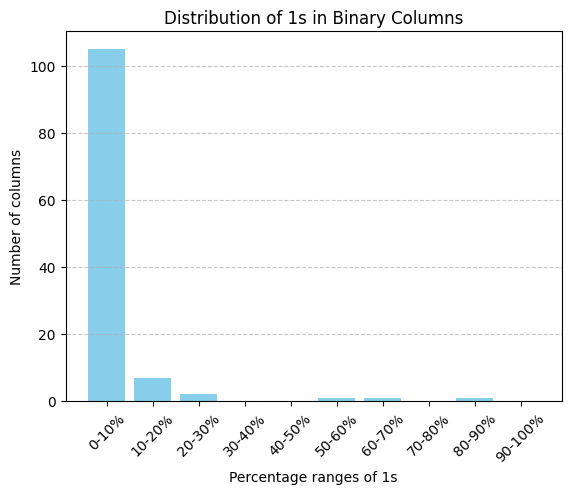

In [11]:
fig, ax = plt.subplots()
ax.bar(percentage_bins.keys(), percentage_bins.values(), color='skyblue')
ax.set_xlabel('Percentage ranges of 1s')
ax.set_ylabel('Number of columns')
ax.set_title('Distribution of 1s in Binary Columns')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

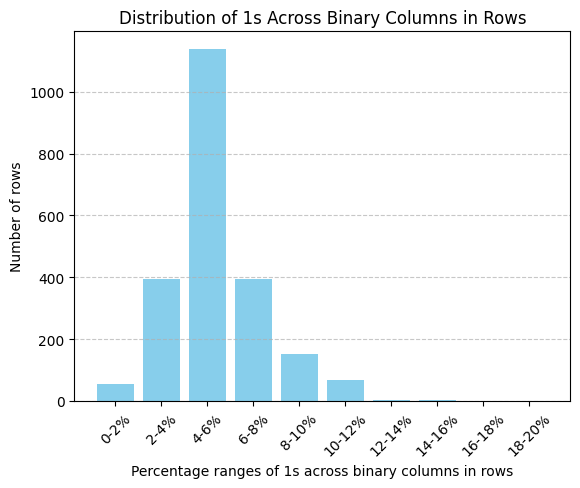

In [14]:
# Identify binary columns
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

# Calculate the percentage of '1's for each row in the binary columns
row_percentages = df[binary_columns].apply(lambda row: (row.sum() / len(binary_columns)) * 100, axis=1)

# Define bins and labels
bins = list(range(0, 22, 2))  # Creating bins from 0% to 20% with a step of 2%
bin_labels = [f'{i}-{i+2}%' for i in range(0, 20, 2)]

# Categorize row percentages into bins
row_categories = pd.cut(row_percentages, bins=bins, labels=bin_labels, right=False)
bin_counts = row_categories.value_counts().sort_index()

# Plotting the results
fig, ax = plt.subplots()
ax.bar(bin_counts.index, bin_counts.values, color='skyblue')
ax.set_xlabel('Percentage ranges of 1s across binary columns in rows')
ax.set_ylabel('Number of rows')
ax.set_title('Distribution of 1s Across Binary Columns in Rows')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [41]:

# Determine continuous columns using a threshold of unique values
threshold_continuous = 0.1 * df.shape[0]
continuous_columns = [col for col in df.columns if df[col].nunique() > threshold_continuous]

for i, col in enumerate(continuous_columns):
    # Check if the column data type is integer
    if (df[col].dtype == 'int64' or df[col].dtype == 'float64') and col != 'id':
        mean_val = df[col].mean()
        max_val = df[col].max()
        min_val = df[col].min()
        range_val = max_val - min_val

        # Print the results
        print(f"{col}: Mean = {mean_val:.2f}, Max = {max_val:.2f}, Range = {range_val:.2f}")

popularity: Mean = 5.31, Max = 140.95, Range = 140.95
revenue: Mean = 37922229.93, Max = 1845034188.00, Range = 1845034188.00
vote_count: Mean = 337.18, Max = 14075.00, Range = 14075.00
average_sentiment: Mean = 0.12, Max = 1.00, Range = 1.51


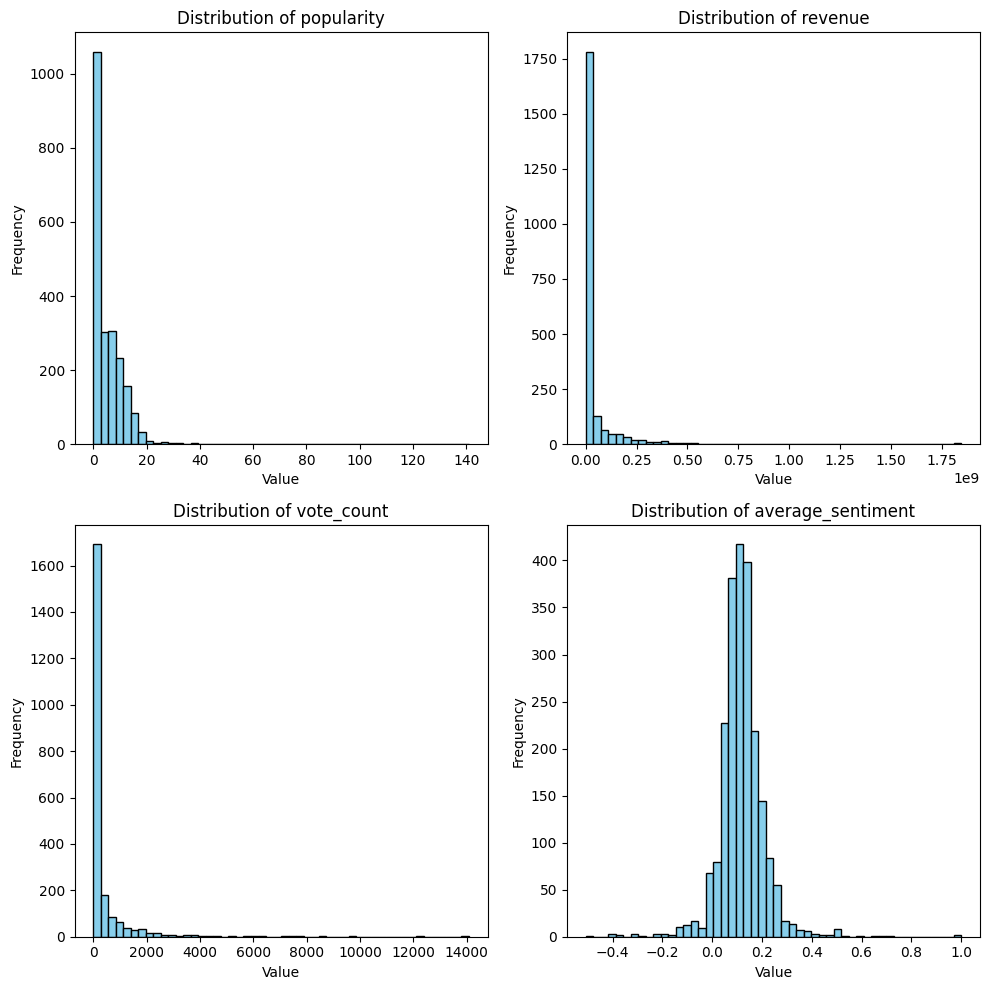

In [38]:
specified_columns = ['popularity', 'revenue', 'vote_count', 'average_sentiment']

df_specified = df[specified_columns]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the axs array for easy iteration
axs = axs.ravel()

for i, col in enumerate(specified_columns):
    axs[i].hist(df_specified[col], bins=50, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# If there are fewer than 4 specified columns, we hide any unused subplots
for j in range(i + 1, 4):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()